In [2]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt

Primary data product is cross powered visibilities are calculated through pairs of antennas
Auto-powered visibilities is the other visibility ‘type’’, but is not are not typically useful for purposes other than individual antenna diagnostics
HERA dataset contains visiblities for each of 4 polarization, baseline, frequency(100 Mhz to 200 Mhz), and time
This particular set corresponds to a portion of a night and only contains XX polarization, corresponding to North-North polarization
Data contains contamination, which can be removed as  the sky signal is expected to be constant in time


### Read the Data + Waterfall Plots
For HERA, make some waterfall plots as described in the HERA data instructions. Additionally, averaging over all times compare the amplitude vs frequency (either for a particular baseline, or across all baselines). This data has some contamination from human sources that must be removed. Can you identify some frequencies at which this is an issue?

In [3]:
path_to_data_file = './Hera/'

uv = UVData()
uv.read('./z.uvh5')
data = uv.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data))
print(data.ndim)

This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)
4


In [4]:
# Look at the antennas that are contained in the array:
print(sorted(uv.antenna_numbers))

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


(20, 1536)


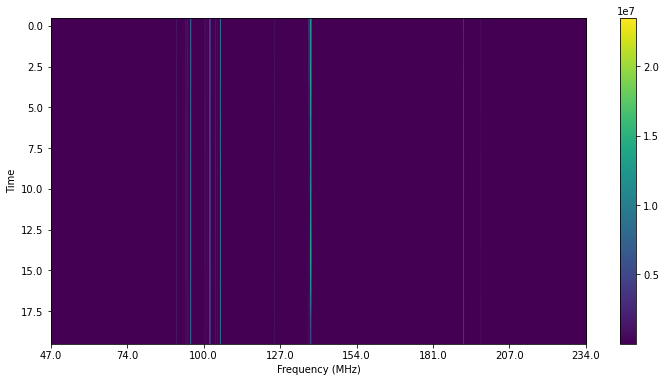

In [5]:
# Pick 2 sample antennas, and get data from that baseline. Note that to get the 'auto-correlations', you can do the 
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 140
antenna2 = 23
data_apair = uv.get_data(antenna1,antenna2)

print(data_apair.shape)
# Waterfall Plot 
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(data_apair),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

# Comparison of Amplitude and Frequency When Averaging Over all Times


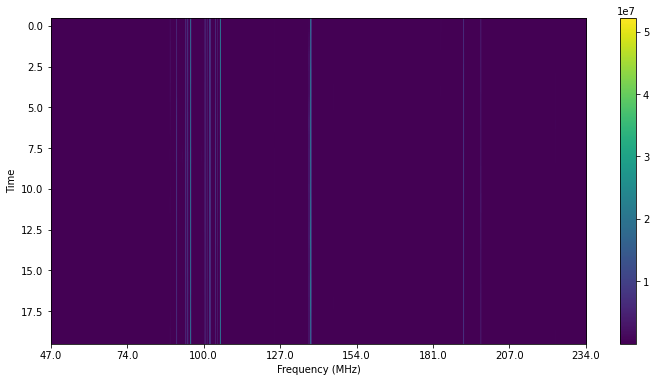

In [6]:
# Pick 2 sample antennas, and get data from that baseline. Note that to get the 'auto-correlations', you can do the 
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 140
antenna2 = 1
data_apair = uv.get_data(antenna1,antenna2)


# Waterfall Plot 
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(data_apair),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

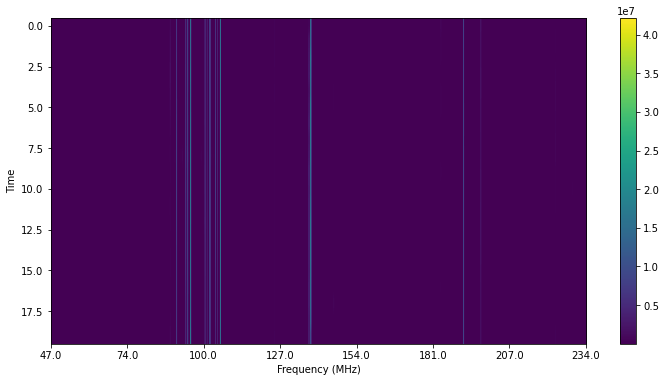

In [7]:
# Pick 2 sample antennas, and get data from that baseline. Note that to get the 'auto-correlations', you can do the 
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 100
antenna2 = 1
data_apair = uv.get_data(antenna1,antenna2)


# Waterfall Plot 
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(data_apair),aspect='auto', ) # aspect: the aspect ratio of the axes
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

### Exploring the Data
Now you have the tools to read and make a basic plot of the data, but the above plot is hard to interpret, and doesn't seem to be telling us much. So, how can we look closer? Here are a few questions you might ask yourselves:

- How can I set the color scale so I can see the most detail?
- What can I do to the data to bring out smaller features? (You may consider exploring logarithms).
- What data product will help me identify antennas that may be broken, or have individual problems?
- Do I see structures as a function of frequency or time that seem concerning or not sky-like? Could I take slices of the current data product to see this more clearly?

#### Question A
How many antennas are there in three data files, zen.2459122.34011.mini.sum.uvh5, zen.2459122.48015.mini.sum.uvh5 and zen.2459122.62018.mini.sum.uvh5?


In [11]:
print(np.shape(sorted(uv.antenna_numbers)))

(104,)


In the data file used for this lab, there are 104 antennas.

#### Question B
How many antennas have visibilities associated with them in the three files?